In [1]:
%matplotlib inline

# Boilerplate code: set up the environment
import matplotlib.pyplot as plt
import pandas
import scipy
import seaborn
#seaborn.set_style("white")
colors = ['red', 'blue']
typelist = ['siLocus', 'ciLocus', 'niLocus', 'iiLocus', 'fiLocus']
plt.rcParams['savefig.dpi'] = 300
seaborn.set_context({"figure.figsize": (12, 8)})

In [2]:
def load_and_prep(filename, index='Species'):
    """Boilerplate code: load data into memory"""
    dataframe = pandas.read_table(filename)
    df = dataframe[dataframe[index].isin(typelist)]
    df = df.set_index([index]).reindex(typelist)
    return df

In [5]:
def make_barplot(dataframe, title=None, xlab=None, ylab=None, ylim=None, lloc=2,
                 legend=True, yticks=None, yticklabs=None, color=None, voffset=250, unique=''):
    """Biolerplate code: make a pretty barplot"""

    plot = dataframe.plot(kind='bar', stacked=True, figsize=(12, 8),
                          fontsize=16, rot=0, color=color)
    for i, label in enumerate(list(dataframe.index)):
        stable = dataframe.ix[label]['Stable']
        notstable = dataframe.ix[label]['NotStable']
        text = '0'
        if stable + notstable > 0:
            perc = stable / (stable + notstable) * 100
            text = '{} ({:.1f}%)'.format(stable, perc)
        plot.annotate(text, (i, stable + notstable + voffset), fontsize=14, ha='center', va='center')
    seaborn.despine(left=True)
    if legend is True:
        _ = plot.legend(loc=lloc, labels=['Conserved', 'Unique to ' + unique], prop={'size': 16})
    if title:
        _ = plt.title(title, fontsize=20)
    if xlab is not None:
        _ = plt.xlabel(xlab)
    if ylab is not None:
        _ = plt.ylabel(ylab)
    if ylim is not None:
        _ = plot.set_ylim(ylim[0], ylim[1])
    if yticks:
        _ = plot.set_yticks(yticks)
    if yticklabs:
        _ = plot.set_yticklabels(yticklabs)
    _ = plot.yaxis.label.set_fontsize(18)

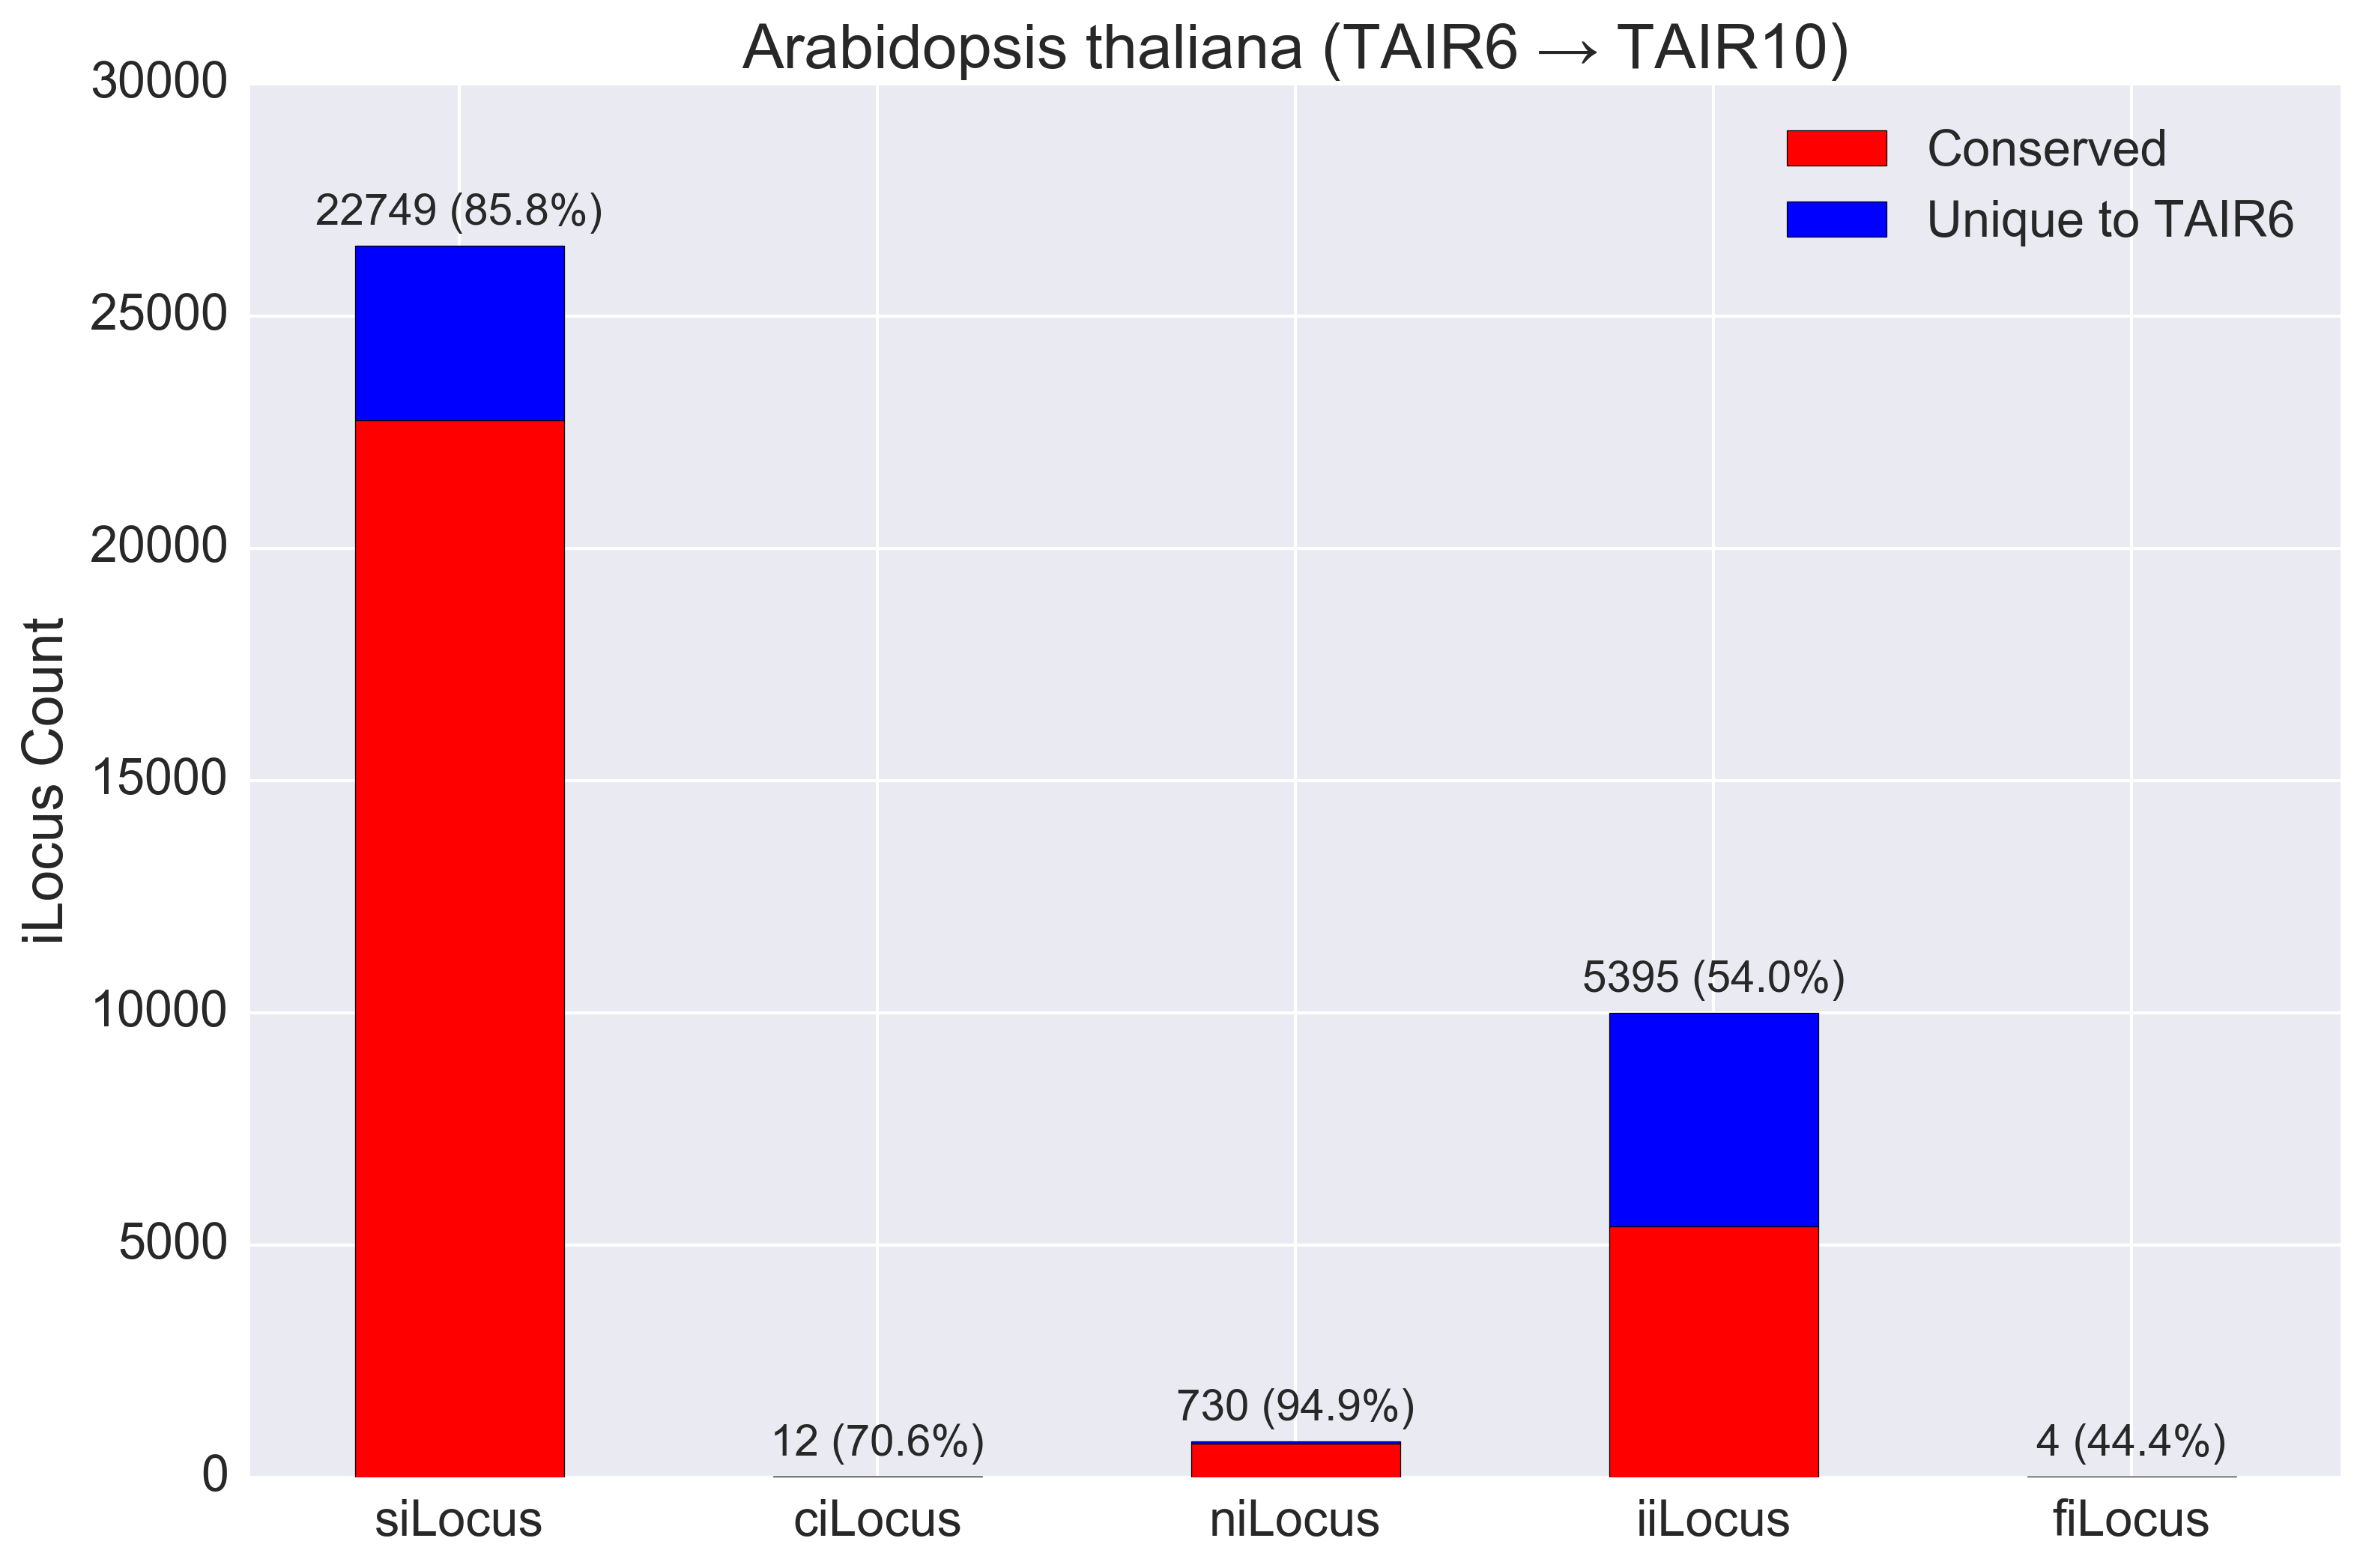

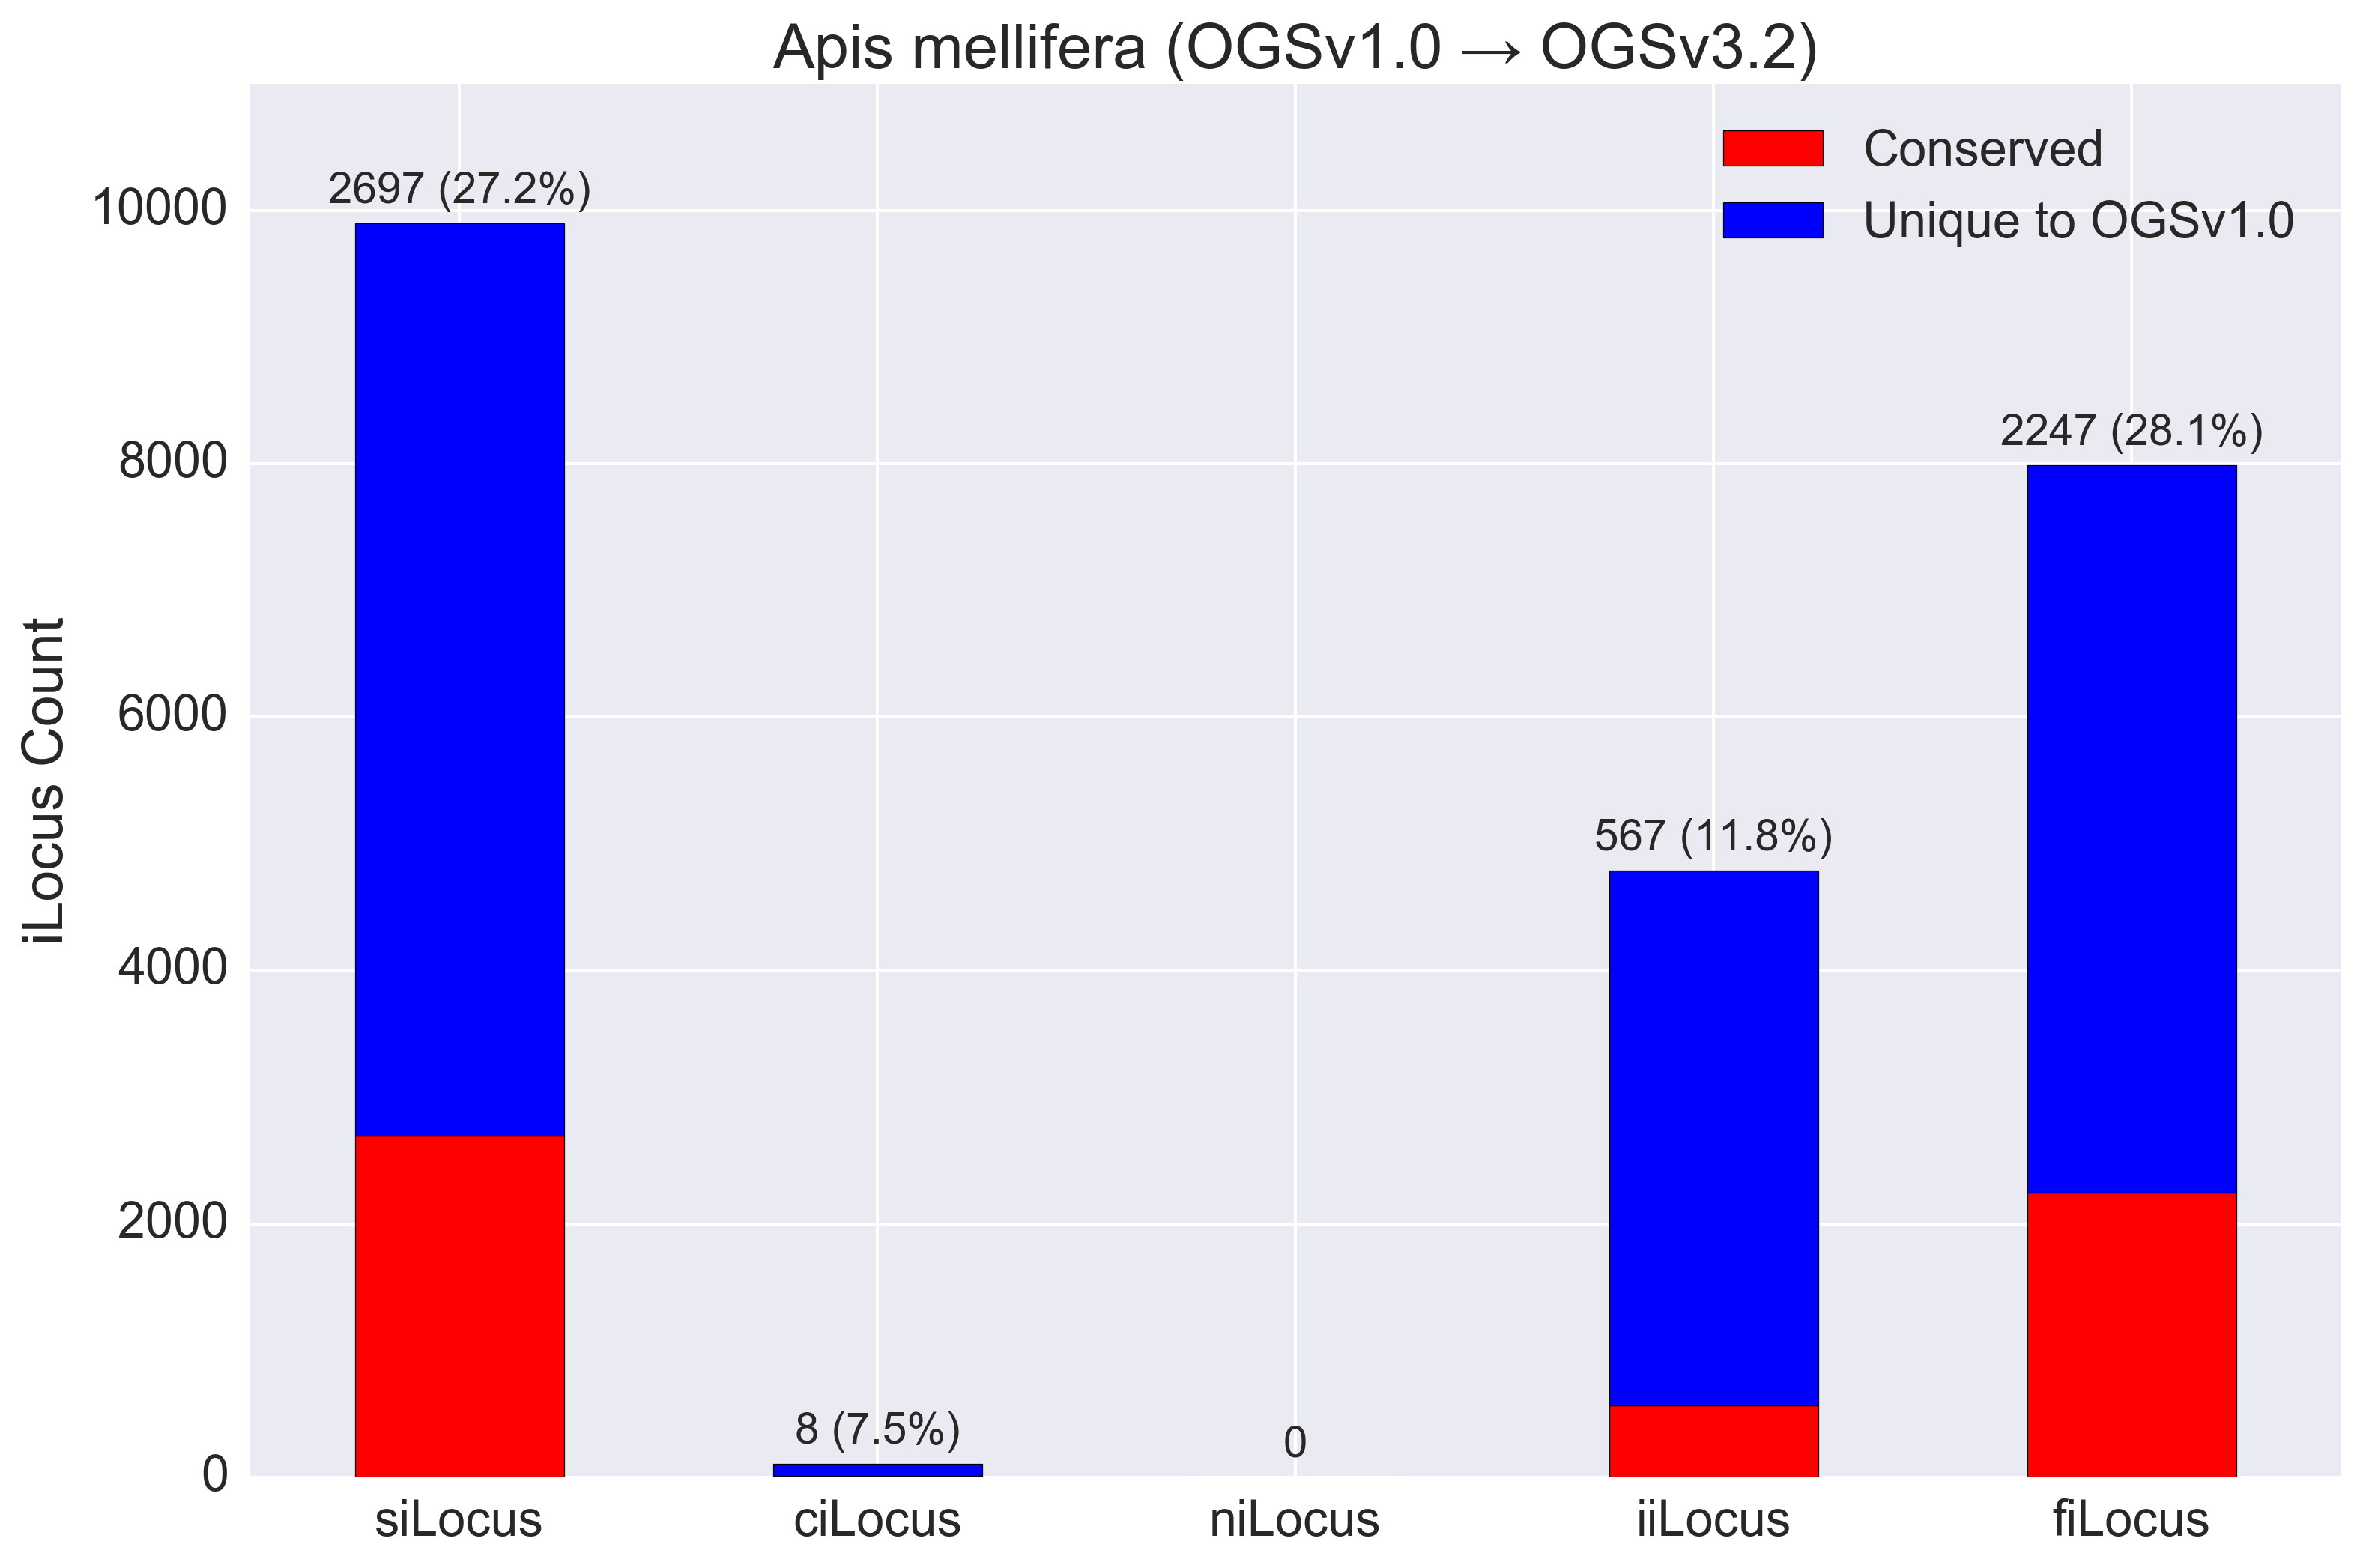

In [6]:
# Now, the actual procedure
bd_atha = load_and_prep('Atha.stable_iloci.tsv', index='iLocusType')
bd_amel = load_and_prep('Amel.stable_iloci.tsv', index='iLocusType')
make_barplot(bd_atha, xlab='', ylab='iLocus Count', lloc=1, color=colors, title='Arabidopsis thaliana (TAIR6 → TAIR10)', unique='TAIR6', voffset=700)
make_barplot(bd_amel, xlab='', ylab='iLocus Count', ylim=(0, 11000), lloc=1, color=colors, title='Apis mellifera (OGSv1.0 → OGSv3.2)', unique='OGSv1.0')